In [32]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Path of the file to read
salary_filepath = "../Salary/salary.csv"

# Read the file into a variable fifa_data
salary_data = pd.read_csv(salary_filepath)

In [3]:
salary_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


# How many responders are there? Are there any missing values in any of the variables? 

In [4]:
#Checking if there are any columns with missing values 
null_columns=salary_data.columns[salary_data.isnull().any()]
salary_data[null_columns].isnull().sum()

salary    1
dtype: int64

there is 1 missing value in the salary column 

In [5]:
print(salary_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB
None


There are 513 reponders

In [6]:
salary_data.count()

salary         513
exprior        514
yearsworked    514
yearsrank      514
market         514
degree         514
otherqual      514
position       514
male           514
Field          514
yearsabs       514
dtype: int64

# What is the lowest salary and highest salary in the group?

In [43]:
salary_col=salary_data.loc[:,'salary']
print("salary min is:",salary_col.min())
print("salary max is:",salary_col.max())

salary min is: 29000.0
salary max is: 96156.0


# What is the mean salary for the sample? Include the standard error of the mean.

In [39]:
print("salary mean is:",salary_col.mean())
print("standard deviation of salary is:",salary_col.std())

salary mean is: 50863.22009783625
standard deviation of salary is: 12685.132357963686


# What is the standard deviation for the years worked?

In [41]:
yr_wrk=salary_data.loc[:,'yearsworked']
print("std of years worked is :",yr_wrk.std())

std of years worked is : 9.444695144169803


# What is the median salary for the sample?

In [42]:
print("meadian salary for the sample is:",salary_col.mean())

meadian salary for the sample is: 50863.22009783625


# What is the interquartile range for salary in the sample?

In [11]:
salary_col.quantile([0.25,0.5,0.75])

0.25    40000.0
0.50    50096.0
0.75    60345.0
Name: salary, dtype: float64

In [12]:
IQR =  60345.0 - 40000.0
print("Salary IQR is:",IQR)

Salary IQR is: 20345.0


# How many men are there in the sample? How many women are there in the sample? Present this information in a table. 

In [13]:
m = salary_data['male'].value_counts()
m.index = ['male  :','female:']
print(m)

male  :    386
female:    128
Name: male, dtype: int64


In [19]:
d = {'Male': [386], 'Female': [128]}
df = pd.DataFrame(data=d)
df

,Male,Female
0,386,128


# How many women are executives compared to men? 

In [46]:
#Executive men vs women

exec_series = salary_data['position'] == 3

position_df = salary_data[exec_series]

print(position_df['male'].value_counts())

print("There are 192 males and 19 female executives")

1    192
0     19
Name: male, dtype: int64
There are 192 males and 19 female executives


# Create a histogram for the variable Salary.

# Histogram for Salary 

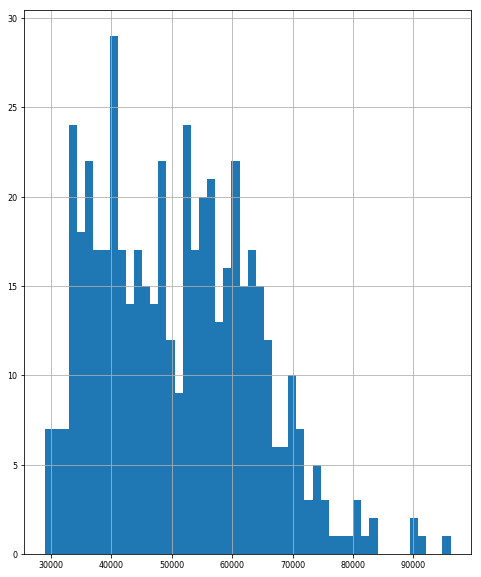

In [16]:
salary_col.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8);

# Examine the histogram and describe the distribution for Salary.

The histogram  is prominently skewed to the right (its tail is longer on the right). There are more people that earn 40000. The ammount of people decreases as the salary increases from 60000.

# Create a bar graph to show the different average salaries of men and women.  What does the graph tell you about the difference between men and women’s salaries? 

0=Female ,1=Male


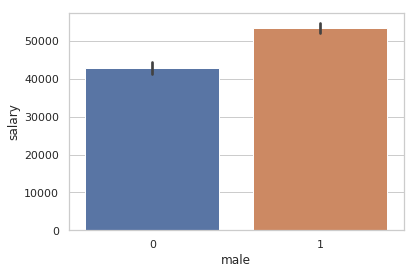

In [17]:
x =salary_data.loc[:,'male']
sns.set(style="whitegrid")
ax = sns.barplot(x, y=salary_col, data=salary_data)
print("0=Female",",1=Male")

Males earn more than females

#     l) Create a scatterplot showing the relationship between Years Worked and Salary (don’t forget to insert a trend line). What is the relationship between Years Worked and Salary?
        1. Describe any patterns in the scatterplot. Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)

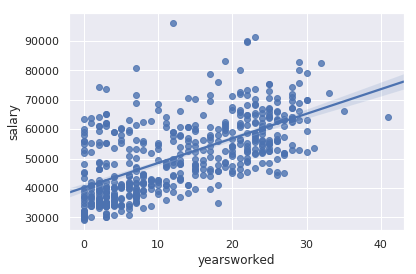

In [18]:
sns.set(color_codes=True)
ax = sns.regplot(x=yr_wrk, y=salary_col, data=salary_data)

There is a linear/positive relationship between years worked and salary.There are outliers where people get payed more for less experience.Years of work and Salary are directly proportional

In [19]:
salary_data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.623589,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610706,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.407214,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044554,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.167137,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.702122,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.361564,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.499316,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


pearson correlation for salary and yearsworked =0.623589 from the above table

# Calculating the correlation manually

In [20]:
salary_data['salary'].corr(salary_data['yearsworked'])

0.6235888657598047

This is doesn't look great, we will try some polynomial expressions like squareroot to see if we should work with it

In [21]:
salary_data['SqrtLotArea']=np.sqrt(salary_data['yearsworked'])
salary_data['salary'].corr(salary_data['SqrtLotArea'])

0.5944193148641789

comparing 0.62 with 0.59 we see that it'll be best to work with 0.62

# Extra graphs for visualization

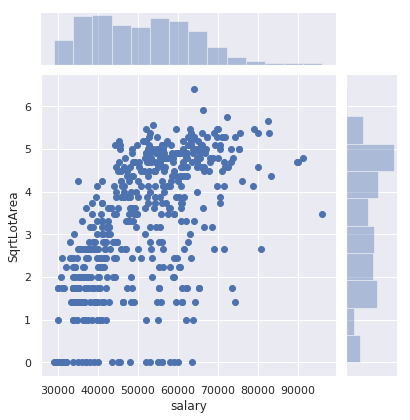

In [22]:
sns.jointplot(salary_data['salary'],salary_data['SqrtLotArea'],color='b');

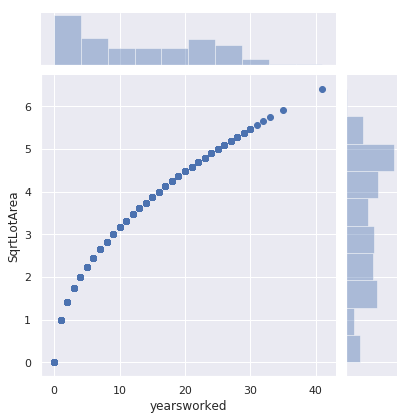

In [23]:
sns.jointplot(salary_data['yearsworked'],salary_data['SqrtLotArea'],color='b');